In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#load the datasets
df = pd.read_csv(r"C:\Users\ADEDOYIN\Documents\Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Task 3**

**Identify highest rated cuisines**

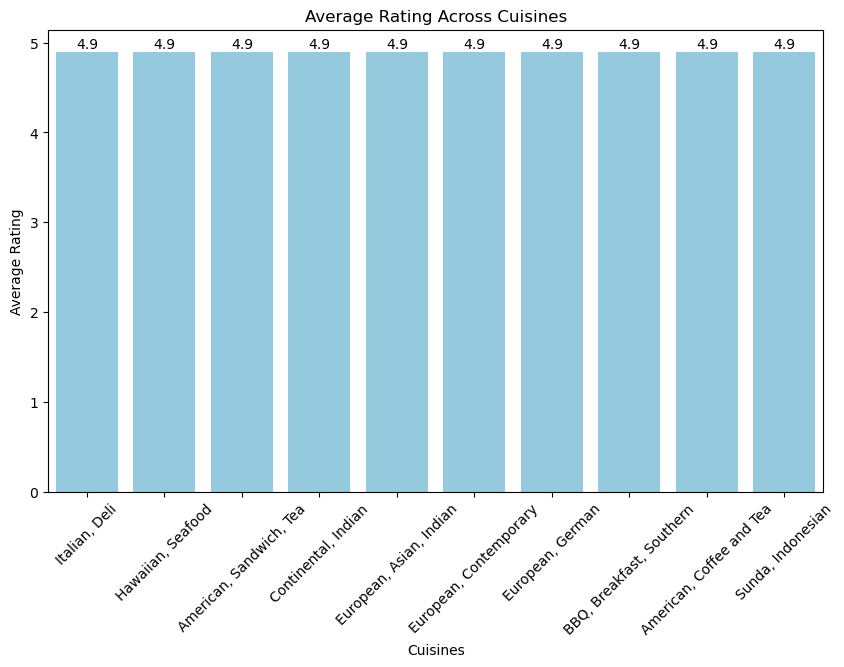

In [11]:
# Group by Cuisines and calculate the average rating
cuisines_ratings = df.groupby('Cuisines')['Aggregate rating'].mean()
top_ten_cuisines = cuisines_ratings.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_ten_cuisines.index, y=top_ten_cuisines.values, color='skyblue')

# Set labels and title
plt.xlabel('Cuisines')
plt.ylabel('Average Rating')
plt.title('Average Rating Across Cuisines')
plt.xticks(rotation=45)

# Add labels above each bar
for bars in plt.gca().containers:
    plt.bar_label(bars)


# Show plot
plt.show()

**Observation**:All the top 10 cuisines types are equally rated and identify as the highest cuisines

**Compare ratings across price points**

In [19]:
price_rating = df.groupby('Price range')['Aggregate rating'].mean()
print(price_rating)

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


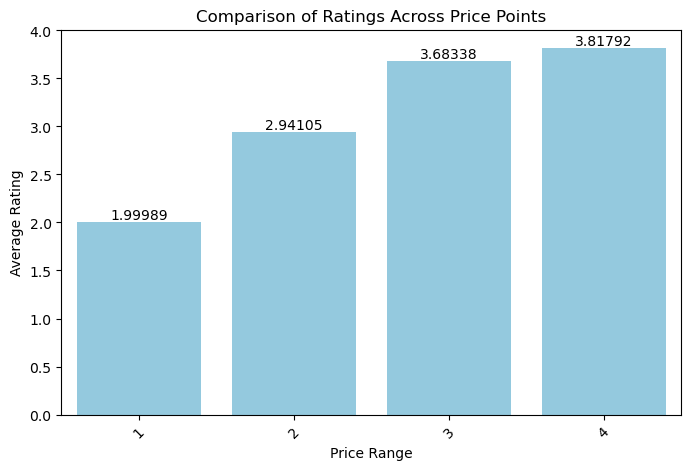

In [21]:
#create a barchart for comparism
plt.figure(figsize=(8,5))
sns.barplot(x=price_rating.index,y=price_rating.values, color='skyblue')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Comparison of Ratings Across Price Points')
plt.xticks(rotation=45)

for bars in plt.gca().containers:
    plt.bar_label(bars)

plt.show()

**Observation**: Higher priced restaurant are rated better,it also shows that affordable pricing doess not neccessary leads to the customer satisfactions

**Analyze table booking and delivery**

In [26]:
# Percentage of restaurants offering table booking and online delivery
# Total number of restaurants
total_restaurants = len(df)

# Percentage calculation
table_booking_percentage = (df['Has Table booking'] == 'Yes').sum() / total_restaurants * 100
online_delivery_percentage = (df['Has Online delivery'] == 'Yes').sum() / total_restaurants * 100

# Display results
print(f"Percentage of restaurants offering Table Booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering Online Delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering Table Booking: 12.12%
Percentage of restaurants offering Online Delivery: 25.66%


**Observation**:The percentage of restaurant offering online delivery is more than Table Booking

**Analyze relationships between cuisines and ratings.**

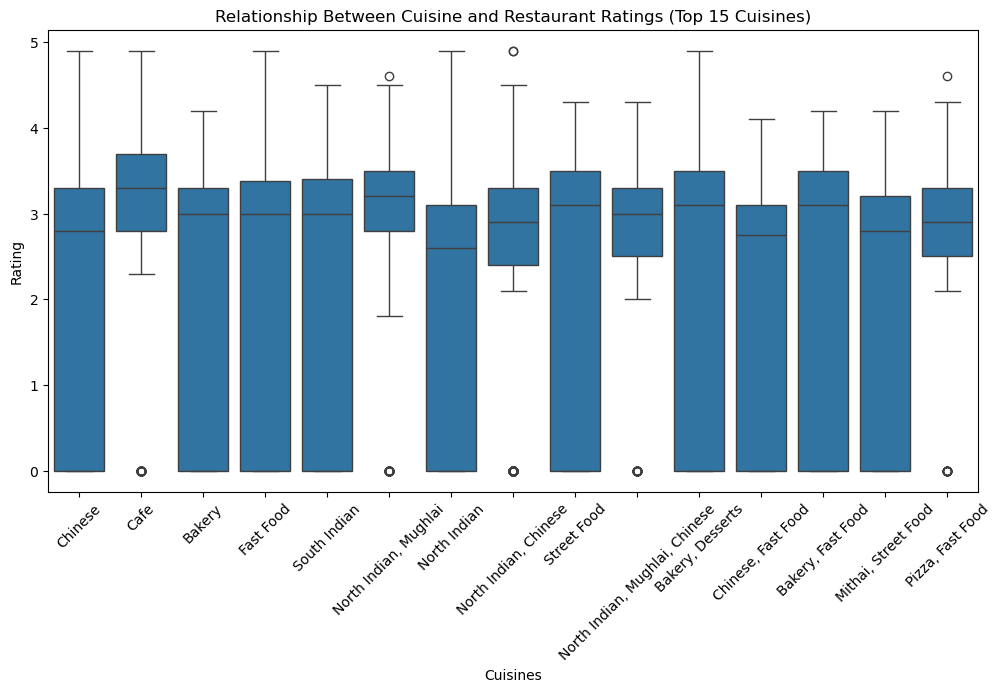

In [34]:
# Analyzing the relationship between the type of cuisine and the restaurant's rating
# There are many cuisine names present in the data, so i select only the top 15 cuisines
top_n = 15
top_cuisines = df['Cuisines'].value_counts().nlargest(top_n).index

# Filter the dataset to include only the top 15 cuisines
df_filtered = df[df['Cuisines'].isin(top_cuisines)]

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Cuisines', y='Aggregate rating')

# Set labels
plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {top_n} Cuisines)')
plt.xlabel('Cuisines')
plt.ylabel('Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display Chart
plt.show()

**Identify popular cuisines by votes.**

In [37]:
#Identifying most popular cuisines based on number of votes
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(10)

# Display result
print("Top Cuisines by Number of Votes:")
print(top_cuisines)


Top Cuisines by Number of Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


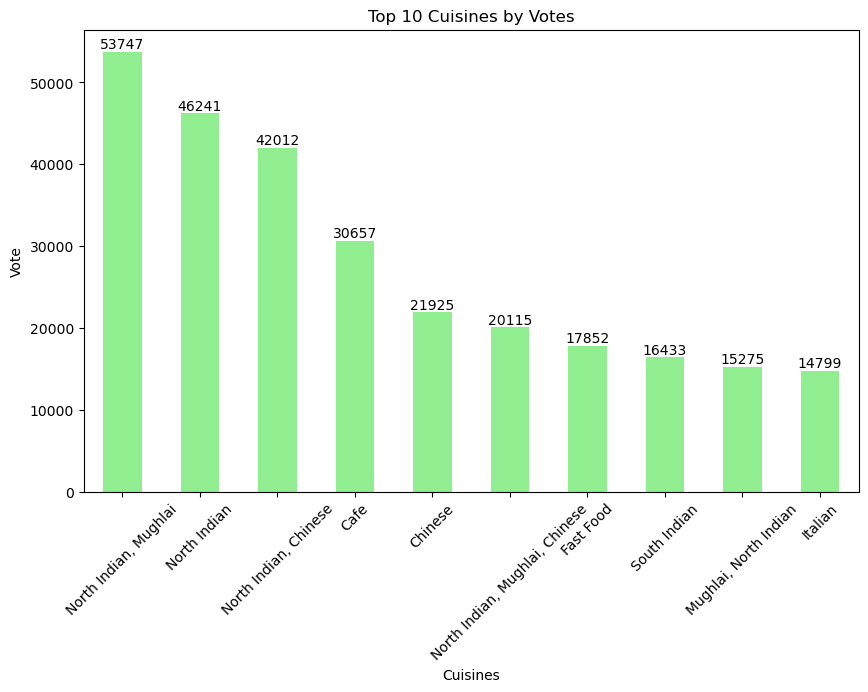

In [39]:
#Identify Popular cuisines by votes
plt.figure(figsize=(10,6))
plot = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='lightgreen')
for bars in plot.containers:
  plot.bar_label(bars)
plt.title('Top 10 Cuisines by Votes')
plt.xlabel('Cuisines')
plt.ylabel('Vote')
plt.xticks(rotation=45)
plt.show()

**Observation**:North indian,Mughlai has the most popular cuisines based on number of votes

**Determine which price ranges receive highest ratings**

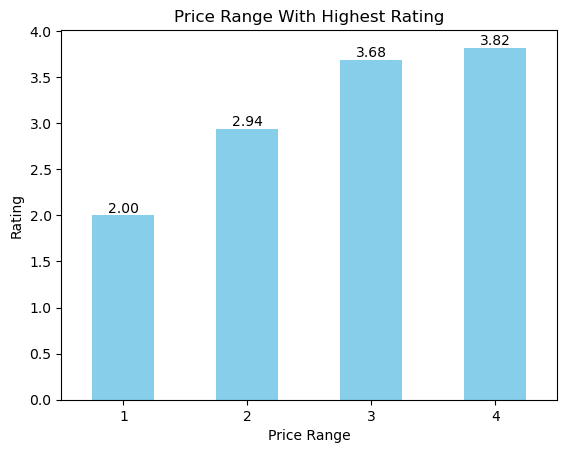

In [49]:
#Price range with highest ratings

plot = df.groupby('Price range')['Aggregate rating'].mean().plot(kind='bar', color='skyblue')
for bars in plot.containers:
  plot.bar_label(bars,  fmt='%.2f')
plt.title('Price Range With Highest Rating')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.xticks(rotation=0)
plt.show()

**Compare restaurants with and without Table Bookings**

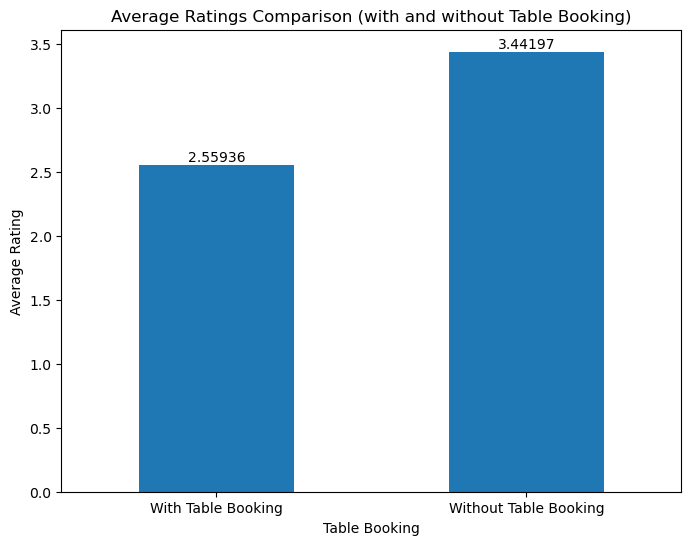

In [52]:
average_ratings = df.groupby('Has Table booking')['Aggregate rating'].mean()

# Plot the comparison
plt.figure(figsize=(8, 6))
average_ratings.plot(kind='bar')
plt.title('Average Ratings Comparison (with and without Table Booking)')
plt.xlabel('Table Booking')
plt.ylabel('Average Rating')
plt.xticks([0, 1], ['With Table Booking', 'Without Table Booking'], rotation=0)

for bars in plt.gca().containers:
    plt.bar_label(bars)
plt.show()

**Observations**:The restaurants without table bookings is highly rated than with table bookings

**Determine if table booking availability affects ratings across different cities.**

In [60]:
city_booking_ratings = df.groupby(['City', 'Has Table booking'])['Aggregate rating'].mean()
city_booking_ratings

City             Has Table booking
??stanbul        No                   4.292857
Abu Dhabi        No                   4.235714
                 Yes                  4.450000
Agra             No                   3.965000
Ahmedabad        No                   4.161905
                                        ...   
Waterloo         No                   3.650000
Weirton          No                   3.900000
Wellington City  No                   4.250000
Winchester Bay   No                   3.200000
Yorkton          No                   3.300000
Name: Aggregate rating, Length: 165, dtype: float64

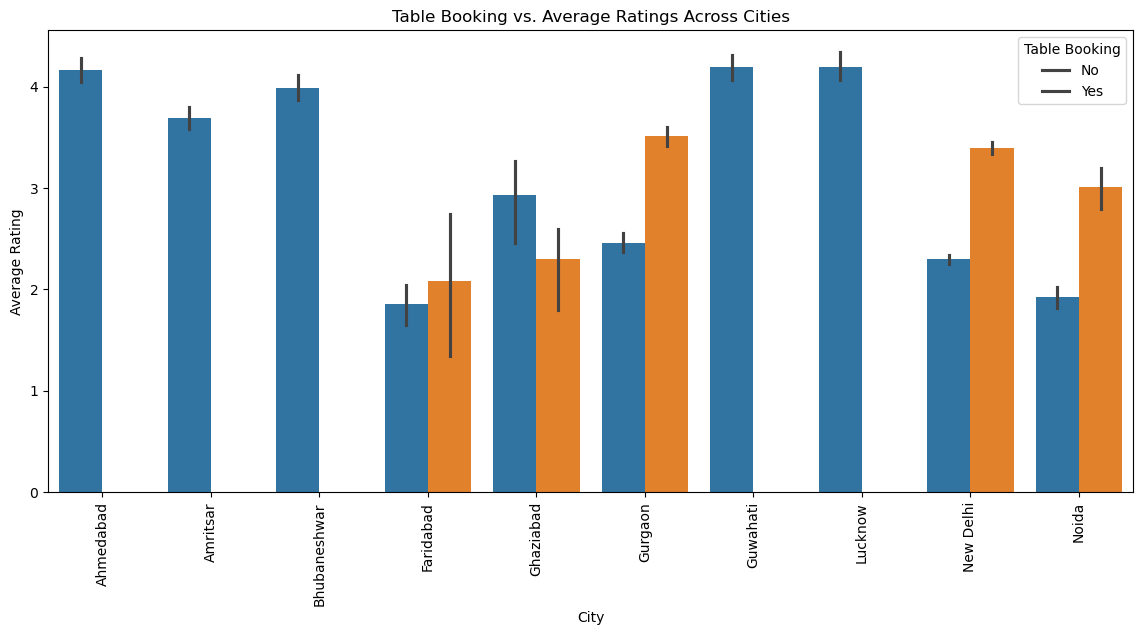

In [62]:
plt.figure(figsize=(14, 6))

# Get top 10 cities by restaurant count
top_cities = df['City'].value_counts().head(10).index
df_top_cities = df[df['City'].isin(top_cities)]  # Filter dataset

# Plot comparison
sns.barplot(data=df_top_cities, x='City', y='Aggregate rating', hue='Has Table booking', estimator=np.mean)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Table Booking vs. Average Ratings Across Cities')
plt.legend(title='Table Booking', labels=['No', 'Yes'])
plt.show()

**Calculate percentage of restaurants offering online delivery**

In [66]:
# Total number of restaurants
total_restaurants = len(df)

# Percentage calculation
online_delivery_percentage = (df['Has Online delivery'] == 'Yes').sum() / total_restaurants * 100

# Display results
print(f"Percentage of restaurants offering Online Delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering Online Delivery: 25.66%


In [70]:
# Group the data by price range and calculate the percentage of restaurants offering online delivery in each group
online_delivery_percentage_by_price_range = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).loc[:, 'Yes'] * 100

print("Percentage of restaurants offering online delivery across price range:")
print(online_delivery_percentage_by_price_range)

Percentage of restaurants offering online delivery across price range:
Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

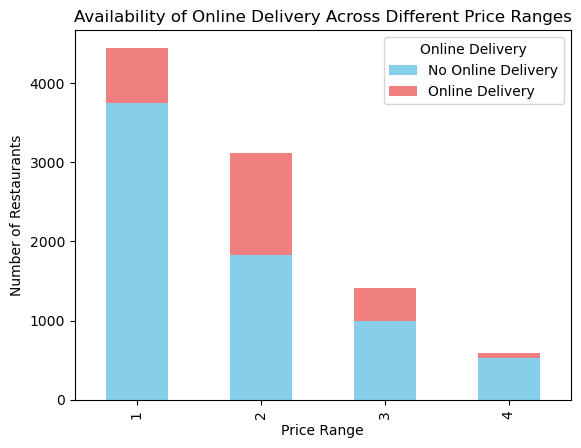

In [74]:
# availability of online delivery among restaurants with different price ranges.
delivery_cross_tab = pd.crosstab(df['Price range'], df['Has Online delivery'])

# Plot the comparison
plt.figure(figsize=(10, 6))
delivery_cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Availability of Online Delivery Across Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.legend(title='Online Delivery', labels=['No Online Delivery', 'Online Delivery'])
plt.show()

**Observation**:Most restaurants offering online delivery fall into Price Range 1 (41.31%) and Price Range 2 (15.77%), while Price Range 4 is the least represented (9.04%).which implies that the online delivery market is predominantly driven by price-conscious consumers.